# Linear algebra (review)

* Linear systems of equations arise widely in numerical methods:
    * nonlinear equations
    * ODEs
    * PDEs
    * interpolation
    * integration
    * quadrature
    * etc.
* Facility with, and understanding of linear systems, and their geometric interpretations is important.
* See this [collection of videos](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab).




### Linear systems
* Write as $Ax = b$, where $A$ is a matrix and $x$, $b$ are vectors.
    * A is an $m \times n$ matrix: $m$ rows and $n$ columns. Usually, $m=n$
    



### Matrix multiplication
$b_i = \sum_j a_{i,j}x_j$

**2 interpretations**

(1) A acts on x to produce b
<img src="https://ignite.byu.edu/che541/lectures/figs/l5f1.png" width="200">


(2) x acts on A to produce b
<img src="https://ignite.byu.edu/che541/lectures/figs/l5f2.png" width="350">

* $b$ is a linear combination of columns of $A$
* Coordinates of vector $x$ define scalar multipliers in the combination of the columns of $A$.
* Columns of $A$ are vectors: we combine them through $x$ to get a new vector $b$.
* Elements of $x$ are like coordinates in the columns of $A$, instead of our usual $\vec{i}$, $\vec{j}$, $\vec{k}$ vector coordinates.


For matrix-matrix multiplication, this process is repeated:
<img src="https://ignite.byu.edu/che541/lectures/figs/l5f3.png" width="350">
* Here, the columns of $C$ are linear combinations of the columns of $A$, where elements of $B$ are the multipliers in those linear combinations.


Also: 
<img src="https://ignite.byu.edu/che541/lectures/figs/l5f4.png" width="370">
* Here, the rows of $C$ are linear combinations of the rows of $A$, where elements of $B$ are the multipliers in those linear combinations.

**Identities:**
* $(AB)^T = B^TA^T$
* $(AB)^{-1} = B^{-1}A^{-1}$

### Definitions

* **Range:** the set of vectors (b) that can be written as $Ax=b$ for some $x$. This is the space spanned by the columns of $A$ since $b$ is a linear combination of the columns of $A$.
* **Rank:** the number of linearly independent rows or columns.
    * for $m\times n$ with full rank with $m\le n \rightarrow$ rank is $m$.
* **Basis:** a basis of vectors spans the space and is linearly independent.
* **Inner product:** $x^Tx \rightarrow s$ where $s$ is a scalar.
* **Outer product:** $xx^T \rightarrow M$ where $M$ is a matrix. (What's the rank?)
* **Nonsingular** matrices are invertable and have solutions to $Ax=b$.

Consider 2D plane:
<img src="https://ignite.byu.edu/che541/lectures/figs/l5f5.png" width="200">
    
* Case a is a unique solution.
* Case b has no solution.
* Case c has $\infty$ solutions
* Case d is a trivial solution

Numerically singular matrices are *almost* singular. That is, they may be singular to within roundoff error, or the near singularity may result in inaccurate results.


### Basis, coordinate systems
$Ax=b$ 

$x=A^{-1}b$.

* Think of $A$ in terms of its column vectors:
<img src="https://ignite.byu.edu/che541/lectures/figs/l5f6.png" width="370">
* For $A\cdot x$, $x$ are the coordinates in the basis of columns of $A$: $a_1$ and $a_2$. 
* For given $b$, $x$ is the vector of coefficients of the unique linear expansion of b in the basis of columns of $A$.
    * **x is b in basis of A**
    * $x$ are coefficients of $b$ in the columns of $A$.
    * $b$ are the coefficients of $b$ in the columns of $I$.


$A^{-1}b \rightarrow$ **change basis** of $b$:
* Normally, when we write $x^T = (x_1, x_2)$, we mean $x = x_1\vec{i} + x_2\vec{j}$, or $x = x_1\cdot(1,0)+x_2\cdot(0,1)$.
* Let $e_i$ be the coordinate vectors, so $e_1 = \vec{i}$ and $e_2 = \vec{j}$, etc.
<img src="https://ignite.byu.edu/che541/lectures/figs/l5f7.png" width="400">

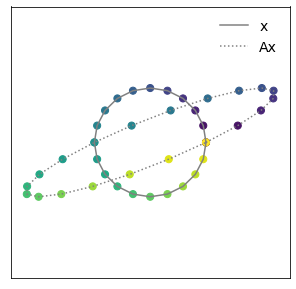

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

A = np.array([[1, 2],[0, 1]])

n=21
colors = cm.viridis(np.linspace(0, 1, n))
θ = np.linspace(0,2*np.pi,n)
x_0 = np.cos(θ)
x_1 = np.sin(θ)

ϕ_0 = np.zeros(len(x_0))
ϕ_1 = np.zeros(len(x_1))
for i in range(len(x_0)):
    x = np.array([x_0[i], x_1[i]])
    ϕ = A.dot(x)
    ϕ_0[i] = ϕ[0]
    ϕ_1[i] = ϕ[1]
    
#------------------- plot result
    
plt.figure(figsize=(5,5))
plt.rc('font', size=14)

plt.plot(x_0,x_1, '-', color='gray', label='x') # x
plt.scatter(x_0,x_1, color=colors, s=50, label='') # x
plt.plot(ϕ_0,ϕ_1, ':', color='gray', label=r'Ax') # x
plt.scatter(ϕ_0,ϕ_1, color=colors, s=50, label='') # Ax
plt.xticks([])
plt.yticks([])

plt.legend(frameon=False)
plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5]);

### Example: Eigenvalue decomposition

$Av = \lambda v$
* $v$ is an eigenvector of $A$ and $\lambda$ is the corresponding eigenvalue.
* Note, normally for $Ax=b$, $A$ operates on $x$ to get a new vector $b$. You can think of $A$ stretching and rotating $x$ to get $b$. 
* For eigenvectors, $A$ does not rotate $v$, it only stretches it. And the stretching factor is $\lambda$.
    * $|\lambda| > 1$: stretch; $0<|\lambda|<1$: compress; $\lambda<0$: reverse direction.
    
$AV = V\Lambda$.
* This is the matrix form. $V$ is a matrix whose columns are the eigenvectors $v$ of $A$. $\Lambda$ is a diagonal matrix with the $\lambda$'s of $A$ on the diagonal.
    * Now, solve this for $A$:
    $$A = V\Lambda V^{-1}.$$
    * Insert this into $Ax=b$:
    $$Ax=b\rightarrow V\Lambda V^{-1}x = b.$$
    * Now, multiply both sides of the second equation by $V^{-1}$:
    $$\Lambda V^{-1}x = V^{-1}b.$$
    * And group terms:
    $$\Lambda (V^{-1}x) = (V^{-1}b).$$
    * Define $\hat{x} =V^{-1}x$ and $\hat{b} = V^{-1}b$.
    * Then 
    $$\Lambda\hat{x} = \hat{b}.$$


So, $Ax=b$ can be written as $\Lambda\hat{x} = \hat{b}$. 
* $\Lambda$ is diagonal, so its easy to invert. 
* The second form is decoupled, meaning, each row of this second equation only involves one component of $x$, whereas each row in $Ax=b$ might contain every $x$ component. 
* $\hat{x}$ is $x$ written in the basis of eigenvectors of $A$. Likewise for $\hat{b}$.
* Note, $x=V\hat{x}$, and $b=V\hat{b}$.
* This decoupling will be very useful later on. 

### Norms
We want to know the *sizes* of vectors and matrices to get a feel for scale.

This is important in many contexts, including stability analysis and error estimation.

A norm provides a positive scalar as a measure of the length.

Notation is $\|x\|$ for the norm of $x$.

Properties:
* $\|x\|\ge0$ and $\|x\|=0$ if and only if $x=0$.
* $\|x+y\| \le \|x\| + \|y\|$. This is the *triangle inequality* (e.g., the length of the hypotenuse is less than the sum of the other two sides of a right triangle).
* $\|\alpha x\| = |\alpha|\|x\|$, where $\alpha$ is a scalar.


P-norms:
* $\|x\|_1 = \sum|x_i|$
* $\|x\|_2 = (\sum|x_i|^2)^{1/2}$
* $\|x\|_p = (\sum|x_i|^p)^{1/p}$
* $\|x\|_{\infty} = \max|x_i|$.
    
Consider the "unit balls" of these norms for vectors in the plane.
<img src="https://ignite.byu.edu/che541/lectures/figs/l5f8.png" width="400">

Matrix norm (induced):
* $\|A\| = \max(\|Ax\|/\|x\|)$ for all $x$. 
* Think of this as the maximum factor by which a matrix stretches a vector. 

### Condition number

* Consider $f(x)$ vs. $x$. A given $\delta x$ added to $x$ will result in some $\delta f$ added to $f$. That is, $x+\delta x\rightarrow f + \delta f$. 
* The condition number relates sensitivity of errors in $x$ to errors in $f$. 
    <img src="https://ignite.byu.edu/che541/lectures/figs/l5f9.png" width="250">



#### Example

$$\left[ \begin{array}{cc}
1 & 1 \\
1  & 1.0001 \\
\end{array} \right] \left[\begin{array}{c} x_1 \\ x_2 \end{array}\right] = 
\left[\begin{array}{c} 2 \\ 2.0001 \end{array}\right]$$

* The solution to this is $(1,1)$. 
* But if we change the 2.0001 to 2.0000, the solution is $(2,0)$.
* A small change in $b$ gives a large change in $x$. 
* The condition number of $A$ is about 40,000.

In [1]:
import numpy as np

A = np.array([[1,1],[1,1.0001]])
b = np.array([2,2.0000])
x = np.linalg.solve(A,b)
print('x = ', x)
print('Condition number of A = ', np.linalg.cond(A))

x =  [2. 0.]
Condition number of A =  40002.00007491187


#### Evaluate the condition number

Note, a property of norms gives $\|Ax\| \le \|A\|\|x\|$

* $Ax=b \rightarrow \|b\|\le\|A\|\|x\|$.
* $A(x+\delta x) = b+\delta b \rightarrow A\delta x = \delta b$
* So, $\delta x = A^{-1}\delta b$
* $\rightarrow \|\delta x\| \le \|A^{-1}\|\|\delta b\|$.
* Combining expressions for $\|b\|$ and $\|\delta x\|$, we get:
$$\|b\|\|\delta x\| \le \|A\|\|x\|\|A^{-1}\|\|\delta b\| = \|A\|\|A^{-1}\|x\|\|\delta b\|$$

So, 

$$\frac{\|\delta x\|}{\|x\|} \le \|A\|\|A^{-1}\|\frac{\|\delta b\|}{\|b\|}$$

* Here, $\|A\|\|A^{-1}\|$ is the condition number $C(A)$.
* This equation means (the relative change in $x$) $\le$ $C(A) \cdot$ (the relative change in $b$).


In terms of relative error (RE): $$RE_x = C(A)\cdot RE_b.$$
* If $C(A) = 1/\epsilon_{mach}$, and $RE_{b}=\epsilon_{mach}$, then $RE_x=1$. That is $RE_x$ = 100% error.
* **When doing matrix inversion, you can expect to lose 1 digit of accuracy for each order of magnitude of $C(A)$.**
    * So, if $C(A) = 1000$, you will lose 3 digits of accuracy (out of 16).